In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from util import *
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
matplotlib.rcParams['figure.figsize'] = [12, 8]

In [3]:
raw_data = pd.read_csv("raw_data_new.csv", parse_dates=[0], index_col=0)
raw_data

,pm25,t2m,d2m,u10,v10,sp,t500,t850,t1000,q500,...,q1000,u500,u850,u1000,v500,v850,v1000,w500,w850,w1000
2014-01-01 08:00:00,51.0,270.487368,258.980250,2.507680,-0.658156,97997.728951,248.554676,270.020533,276.617789,0.000131,...,0.001265,23.046411,10.548611,3.180156,-20.240968,-9.274819,-0.819754,-0.362159,0.270265,0.257394
2014-01-01 14:00:00,23.0,283.838611,258.241520,3.154037,-0.050984,98048.881796,249.264215,270.571515,282.831868,0.000194,...,0.001557,23.175371,8.060430,3.081539,-16.076533,-5.246438,0.187835,-0.213867,0.326162,0.170515
2014-01-01 20:00:00,66.0,273.009328,261.723400,1.842218,-1.248453,98354.616140,248.722481,271.406578,282.505506,0.000195,...,0.001777,23.576161,6.588762,1.987903,-10.424377,-6.522191,-1.084960,-0.113473,0.107447,0.193131
2014-01-02 02:00:00,127.0,270.101179,262.794066,0.369782,-1.550008,98568.984998,248.943138,271.072288,278.768867,0.000185,...,0.001637,18.130736,5.157552,0.032000,-7.689495,-0.974540,-2.949295,0.033899,-0.050130,0.173733
2014-01-02 08:00:00,119.0,268.554291,262.665035,0.382165,-1.082520,98565.141143,248.187354,271.501711,275.817080,0.000187,...,0.001611,17.444210,7.410570,0.221648,-2.653525,2.969054,-1.754386,0.091726,-0.135630,0.127581
2014-01-02 14:00:00,108.0,281.021141,262.805886,1.372043,0.864305,98220.376883,249.590576,273.640898,279.917078,0.000165,...,0.001549,22.720216,8.290536,1.422752,-4.169837,1.569078,0.806979,0.041438,0.067731,0.040518
2014-01-02 20:00:00,168.0,274.254307,263.928755,1.946937,-1.228454,98300.802165,249.183615,272.620853,281.459036,0.000551,...,0.001680,17.466968,6.941507,2.047326,-1.737625,-6.505430,-1.026792,-0.127448,0.222734,0.176215
2014-01-03 02:00:00,122.0,273.074404,262.622681,1.463319,-2.884348,98494.769021,247.280942,271.582311,278.024974,0.000362,...,0.001649,15.818295,2.872926,2.037211,-3.809984,-11.719848,-4.760390,-0.027514,0.467191,0.325794
2014-01-03 08:00:00,30.0,270.140652,260.127744,0.696676,-2.797163,98825.044903,245.507756,269.041449,273.967259,0.000186,...,0.001449,9.958174,-4.042902,1.067478,-8.480185,-10.603811,-4.742644,0.099449,0.074810,0.313658
2014-01-03 14:00:00,16.0,280.057803,259.841117,0.031922,-1.408137,98795.476785,245.383553,267.792819,278.764903,0.000231,...,0.001501,8.070545,0.350609,0.160961,-9.105245,-4.878698,-1.426081,0.152680,-0.017033,0.089704


In [4]:
# Setting parameters
# specify the number of lag hours, 用前lag_hours来预测后predict_hours
lag_hours = 8
predict_hours = 3
n_features = 21

In [5]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(raw_data)
reframed = series_to_supervised(scaled, lag_hours, predict_hours)

In [6]:
# Turn off shuffle, because it's a sequense model!!!
train, test = train_test_split(reframed.values, train_size=0.8, test_size=0.2, shuffle=False)
train_X = train[:, :n_features*lag_hours]

# select the pm25 data we want to predict
pm25_select = []
for i in range(predict_hours , 0, -1):
    pm25_select.append(-n_features * i)
    
train_y = train[:, pm25_select]
test_X = test[:, :n_features*lag_hours]
test_y = test[:, pm25_select]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4382, 168) (4382, 3) (1096, 168) (1096, 3)


In [12]:
train_X = train_X.reshape(train_X.shape[0], lag_hours, 21)
test_X = test_X.reshape(test_X.shape[0], lag_hours, 21)

# LSTM using Keras

In [7]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(predict_hours))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 4382 samples, validate on 1096 samples
Epoch 1/100
 - 1s - loss: 0.1024 - val_loss: 0.1021
Epoch 2/100
 - 1s - loss: 0.0979 - val_loss: 0.0887
Epoch 3/100
 - 1s - loss: 0.0824 - val_loss: 0.0531
Epoch 4/100
 - 1s - loss: 0.0741 - val_loss: 0.0750
Epoch 5/100
 - 1s - loss: 0.0741 - val_loss: 0.0545
Epoch 6/100
 - 1s - loss: 0.0696 - val_loss: 0.0656
Epoch 7/100
 - 1s - loss: 0.0720 - val_loss: 0.0459
Epoch 8/100
 - 1s - loss: 0.0677 - val_loss: 0.0503
Epoch 9/100
 - 1s - loss: 0.0682 - val_loss: 0.0841
Epoch 10/100
 - 1s - loss: 0.0742 - val_loss: 0.0518
Epoch 11/100
 - 1s - loss: 0.0663 - val_loss: 0.0494
Epoch 12/100
 - 1s - loss: 0.0644 - val_loss: 0.0505
Epoch 13/100
 - 1s - loss: 0.0658 - val_loss: 0.0632
Epoch 14/100
 - 1s - loss: 0.0678 - val_loss: 0.0424
Epoch 15/100
 - 1s - loss: 0.0651 - val_loss: 0.0429
Epoch 16/100
 - 1s - loss: 0.0630 - val_loss: 0.0475
Epoch 17/100
 - 1s - loss: 0.0628 - val_loss: 0.0602
Epoch 18/100
 - 1s - loss: 0.0655 - val_loss: 0.0419
Epoch 1

In [65]:
# inverse transform
def inv_normalization(y, predict_hours):
    if len(y.shape) == 1:
        y = y[:, np.newaxis]
        print(y.shape)
        
    inv_y = np.copy(y)
    for i in range(predict_hours):
        #transform to raw shape (, 5)
        y_ = y[:, i]
        y_ = y_.reshape(len(y), 1)
        raw_ = np.tile(y_, (1, 21))
        inv_ = scaler.inverse_transform(raw_)
        inv_y[:, i] = inv_[:, 0]
    return inv_y

In [9]:
ypredict = model.predict(test_X)

In [10]:
pm25_predict = inv_normalization(ypredict, predict_hours)
pm25_actual = inv_normalization(test_y, predict_hours)

In [23]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict[:, i], pm25_actual[:, i])))

predict_hours 0
mae:
22.51953886019705
rmse:
35.991887932001006
predict_hours 1
mae:
28.511499767701554
rmse:
44.224471029415156
predict_hours 2
mae:
28.694568321305958
rmse:
47.105613314238994


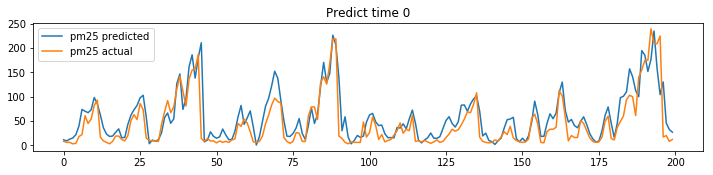

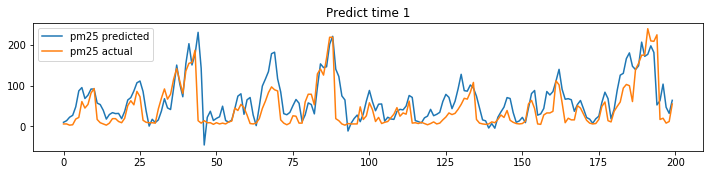

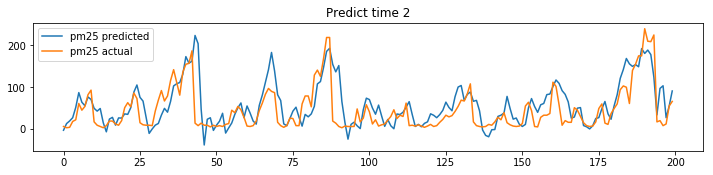

In [21]:
# Plot for LSTM
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

## Linear model

In [13]:
from sklearn import linear_model

In [14]:
# linear regression
train_X_reshaped = train_X.reshape((train_X.shape[0], train_X.shape[1] * train_X.shape[2]))

reg = linear_model.LinearRegression()
reg.fit(train_X_reshaped, train_y)
y_predict_lr = reg.predict(test_X.reshape((test_X.shape[0], test_X.shape[1] * test_X.shape[2])))

pm25_predict_lr = inv_normalization(y_predict_lr, predict_hours)


In [24]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict_lr[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict_lr[:, i], pm25_actual[:, i])))

predict_hours 0
mae:
26.580198387876433
rmse:
39.16174113371231
predict_hours 1
mae:
34.5751452156199
rmse:
49.11368610067947
predict_hours 2
mae:
39.83204964308889
rmse:
54.77784801775598


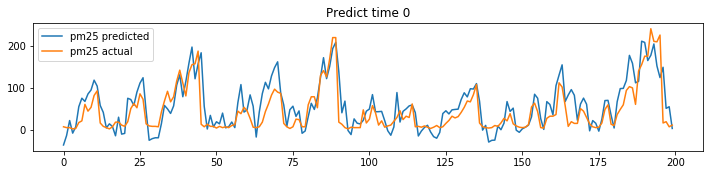

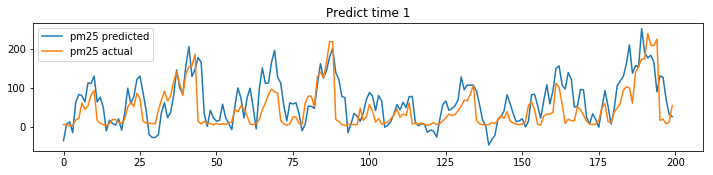

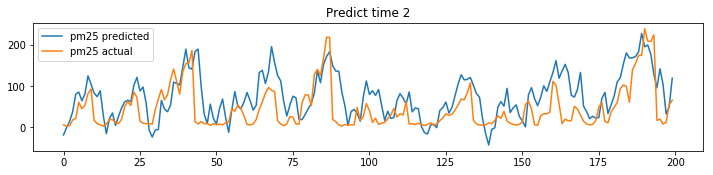

In [20]:
# Plot for linear regression
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict_lr[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

In [24]:
t = np.tile(ypredict,(1,5))

In [167]:
train_y.shape

(2131, 1)

In [108]:
ypredict.shape

(532, 3)

In [121]:
pm25_actual.shape

(532, 3)

In [116]:
pm25_predict[:,1]

array([ 0.02512626,  0.13157386,  0.42580077,  0.01957737,  0.06231519,
        0.02118389,  0.16410474,  0.05062803,  0.07270921,  0.01696643,
        0.13278526,  0.10435077,  0.05019544,  0.17845559,  0.05315086,
        0.07699878,  0.03578535,  0.20254955,  0.00799736,  0.03828513,
        0.03645626, -0.02934895,  0.07096433,  0.05544633,  0.00306354,
       -0.00184802,  0.0489907 ,  0.045976  ,  0.08306812,  0.26169065,
        0.06274786,  0.05632127,  0.28027174,  0.06150862,  0.03163888,
        0.01078969,  0.02413501,  0.1811978 ,  0.03442261,  0.07689123,
        0.03582137,  0.11131186, -0.00857573,  0.07133815,  0.09203243,
        0.09898623,  0.04388558,  0.06305756,  0.04395104,  0.1310133 ,
        0.08464725,  0.02060915,  0.2815719 ,  0.10502711,  0.14615808,
        0.05662401,  0.06258877,  0.05891931,  0.07595711,  0.13015519,
        0.34132555,  0.04103775,  0.38648757,  0.19144152,  0.01765127,
        0.01077341,  0.23759626,  0.16167738,  0.01709972,  0.15

# LSTM implemented by PyTorch

In [17]:
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

import utility as util

global logger

util.setup_log()
# util.setup_path()
logger = util.logger

In [120]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, logger=logger):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.logger = logger
        
    def forward(self, input_data):
        #Set initial states
        h0 = torch.zeros(self.num_layers, input_data.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, input_data.size(0), self.hidden_size)
        
        #Forward propagation of RNN
        out, self.hidden = self.lstm(input_data, (h0, c0))
        
        #Decode hidden state of last time step, and followed by a fully connected layer
        out = self.fc(out[:, -1, :])

        return out


In [91]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)

(4382, 8, 21)
(1096, 8, 21)
(4382, 3)


In [122]:
num_epochs = 10
learning_rate = 0.01
rnn = LSTM(input_size=n_features, hidden_size=64, num_layers=1, output_size=predict_hours)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
    
# Train the Model
for epoch in range(num_epochs):
    for i, (X, y) in enumerate(zip(train_X, train_y)):
        X_ = torch.from_numpy(X).type(torch.FloatTensor).view(-1, lag_hours, n_features)
        y_true = torch.from_numpy(y).type(torch.FloatTensor)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
#         logger.info("Shape of X: %s", X_.shape)
        y_pred = rnn(X_).squeeze()
#         logger.info("Shape of y_pred: %s", y_pred)
        loss = criterion(y_pred, y_true)
        
#         logger.info("Loss: %s", loss)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d],  Loss: %.4f' 
                   %(epoch+1, num_epochs,  loss.data[0]))
            print('y_pred: %.4f, y_true: %.4f'%(y_pred[0], y_true[0]))


    

# print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total)) 


/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/10],  Loss: 0.0012
y_pred: 0.1290, y_true: 0.0938
Epoch [1/10],  Loss: 0.0076
y_pred: 0.1824, y_true: 0.3094
Epoch [1/10],  Loss: 0.0047
y_pred: 0.0863, y_true: 0.0132
Epoch [1/10],  Loss: 0.0039
y_pred: 0.1555, y_true: 0.1686
Epoch [1/10],  Loss: 0.0008
y_pred: 0.0890, y_true: 0.0572
Epoch [1/10],  Loss: 0.0046
y_pred: 0.0616, y_true: 0.1485
Epoch [1/10],  Loss: 0.0334
y_pred: 0.2343, y_true: 0.0257
Epoch [1/10],  Loss: 0.0295
y_pred: 0.2067, y_true: 0.0092
Epoch [1/10],  Loss: 0.0064
y_pred: 0.0884, y_true: 0.2177
Epoch [1/10],  Loss: 0.0008
y_pred: 0.1293, y_true: 0.0808
Epoch [1/10],  Loss: 0.0303
y_pred: 0.1508, y_true: 0.2787
Epoch [1/10],  Loss: 0.0035
y_pred: 0.0363, y_true: 0.0202
Epoch [1/10],  Loss: 0.0836
y_pred: 0.0938, y_true: 0.4154
Epoch [1/10],  Loss: 0.0208
y_pred: 0.1528, y_true: 0.0323
Epoch [1/10],  Loss: 0.0001
y_pred: 0.0173, y_true: 0.0069
Epoch [1/10],  Loss: 0.0205
y_pred: 0.1509, y_true: 0.0161
Epoch [1/10],  Loss: 0.0073
y_pred: 0.0779, y_true: 0.15

Epoch [4/10],  Loss: 0.0119
y_pred: 0.2265, y_true: 0.2787
Epoch [4/10],  Loss: 0.0054
y_pred: 0.0107, y_true: 0.0202
Epoch [4/10],  Loss: 0.0188
y_pred: 0.2552, y_true: 0.4154
Epoch [4/10],  Loss: 0.0231
y_pred: 0.1593, y_true: 0.0323
Epoch [4/10],  Loss: 0.0002
y_pred: -0.0098, y_true: 0.0069
Epoch [4/10],  Loss: 0.0204
y_pred: 0.1723, y_true: 0.0161
Epoch [4/10],  Loss: 0.0023
y_pred: 0.1345, y_true: 0.1548
Epoch [4/10],  Loss: 0.0080
y_pred: 0.0011, y_true: 0.0642
Epoch [4/10],  Loss: 0.0006
y_pred: 0.0404, y_true: 0.0378
Epoch [4/10],  Loss: 0.0018
y_pred: 0.0595, y_true: 0.1320
Epoch [4/10],  Loss: 0.0015
y_pred: 0.0899, y_true: 0.1201
Epoch [4/10],  Loss: 0.0060
y_pred: 0.1183, y_true: 0.1496
Epoch [4/10],  Loss: 0.0001
y_pred: 0.0083, y_true: 0.0279
Epoch [4/10],  Loss: 0.0187
y_pred: 0.1438, y_true: 0.0147
Epoch [4/10],  Loss: 0.0141
y_pred: 0.1246, y_true: 0.1496
Epoch [4/10],  Loss: 0.0077
y_pred: 0.0667, y_true: 0.1276
Epoch [4/10],  Loss: 0.0112
y_pred: 0.1114, y_true: 0.0

Epoch [7/10],  Loss: 0.0017
y_pred: 0.0819, y_true: 0.1201
Epoch [7/10],  Loss: 0.0057
y_pred: 0.1087, y_true: 0.1496
Epoch [7/10],  Loss: 0.0002
y_pred: 0.0071, y_true: 0.0279
Epoch [7/10],  Loss: 0.0216
y_pred: 0.1604, y_true: 0.0147
Epoch [7/10],  Loss: 0.0119
y_pred: 0.1459, y_true: 0.1496
Epoch [7/10],  Loss: 0.0129
y_pred: 0.0369, y_true: 0.1276
Epoch [7/10],  Loss: 0.0609
y_pred: 0.2079, y_true: 0.0044
Epoch [7/10],  Loss: 0.0018
y_pred: 0.4039, y_true: 0.3768
Epoch [7/10],  Loss: 0.0009
y_pred: 0.0269, y_true: 0.0205
Epoch [7/10],  Loss: 0.0014
y_pred: 0.0070, y_true: 0.0132
Epoch [7/10],  Loss: 0.0063
y_pred: 0.0588, y_true: 0.1217
Epoch [7/10],  Loss: 0.0004
y_pred: 0.0455, y_true: 0.0425
Epoch [7/10],  Loss: 0.0147
y_pred: 0.1839, y_true: 0.0718
Epoch [7/10],  Loss: 0.0017
y_pred: 0.1451, y_true: 0.0792
Epoch [7/10],  Loss: 0.0004
y_pred: 0.0813, y_true: 0.0601
Epoch [7/10],  Loss: 0.0130
y_pred: 0.0742, y_true: 0.1906
Epoch [7/10],  Loss: 0.0002
y_pred: 0.0651, y_true: 0.05

Epoch [10/10],  Loss: 0.0033
y_pred: 0.0775, y_true: 0.1217
Epoch [10/10],  Loss: 0.0003
y_pred: 0.0489, y_true: 0.0425
Epoch [10/10],  Loss: 0.0167
y_pred: 0.1870, y_true: 0.0718
Epoch [10/10],  Loss: 0.0018
y_pred: 0.1531, y_true: 0.0792
Epoch [10/10],  Loss: 0.0004
y_pred: 0.0795, y_true: 0.0601
Epoch [10/10],  Loss: 0.0076
y_pred: 0.1481, y_true: 0.1906
Epoch [10/10],  Loss: 0.0003
y_pred: 0.0772, y_true: 0.0513
Epoch [10/10],  Loss: 0.0093
y_pred: 0.1262, y_true: 0.0469
Epoch [10/10],  Loss: 0.0349
y_pred: 0.1816, y_true: 0.2683
Epoch [10/10],  Loss: 0.0020
y_pred: 0.1355, y_true: 0.1129
Epoch [10/10],  Loss: 0.1138
y_pred: 0.2779, y_true: 0.7742
Epoch [10/10],  Loss: 0.1374
y_pred: 0.0011, y_true: 0.3871
Epoch [10/10],  Loss: 0.0081
y_pred: 0.0737, y_true: 0.0044


In [123]:
# Test the Model
y_pred = np.zeros(train_y.shape)
for i, (X, y) in enumerate(zip(train_X, train_y)):
#     print(X)
    X_ = torch.from_numpy(X).type(torch.FloatTensor).view(-1, lag_hours, n_features)
#     logger.info("Shape of X: %s", X_.shape)
    y_pred[i] = rnn(X_).squeeze().detach().numpy()
    print(y_pred[i])

[0.00704107 0.00805148 0.02381541]
[-0.00263754  0.00371432  0.0218741 ]
[0.04842031 0.04785196 0.05675121]
[0.12894312 0.11665995 0.11161356]
[0.21349508 0.1885522  0.17037112]
[0.24111386 0.214441   0.19129948]
[0.23550044 0.20287259 0.17801264]
[0.21441078 0.18437657 0.1641414 ]
[0.04768431 0.04534459 0.05468036]
[0.02365604 0.02687021 0.04072139]
[0.06309593 0.06038287 0.06675343]
[0.16702838 0.15146546 0.13752636]
[0.2495338  0.21757968 0.19208166]
[0.21737236 0.19402941 0.17342995]
[0.23609585 0.20502764 0.18088919]
[0.21926126 0.1896735  0.16829093]
[0.12235004 0.10650393 0.10215927]
[0.02720726 0.02430272 0.03644283]
[-0.01036537 -0.00792342  0.01066913]
[-0.01517323 -0.00808418  0.01165931]
[-0.01564857 -0.0077385   0.01208873]
[-0.01840526 -0.01079822  0.00958635]
[-0.01463857 -0.00597671  0.01407307]
[0.00339875 0.01207638 0.03010499]
[0.00976759 0.01815473 0.03567821]
[0.0210923  0.02890201 0.04566137]
[0.01995522 0.02598241 0.04114397]
[0.05903257 0.0590449  0.06792182]
[0

[0.24481654 0.21175513 0.18624815]
[0.11819865 0.10562566 0.10250378]
[0.08744636 0.07841305 0.08046134]
[0.19694807 0.16935202 0.15199831]
[0.24305962 0.20902503 0.18295424]
[0.25336593 0.21636765 0.18883893]
[0.19994229 0.17595865 0.1552204 ]
[0.24040198 0.21078995 0.1806601 ]
[0.27642092 0.23608769 0.20367172]
[0.19121408 0.16332743 0.14666757]
[ 0.00423801 -0.00015208  0.015065  ]
[-0.01397353 -0.00721195  0.01217687]
[-0.01687899 -0.0104447   0.00939101]
[-0.00975528 -0.00385371  0.01473267]
[0.00839251 0.0129393  0.02813745]
[0.16249028 0.14269444 0.12942749]
[0.10656771 0.09887654 0.09191467]
[0.10201547 0.09336403 0.09075271]
[0.04255345 0.04105879 0.05037169]
[0.01500171 0.01545747 0.02965447]
[-0.00777501 -0.00159398  0.01692216]
[0.00088248 0.00812763 0.02586742]
[-0.00871673 -0.00158015  0.01737571]
[0.04331097 0.04281344 0.05254237]
[0.04691309 0.0469024  0.05624545]
[0.0296495  0.03267866 0.04523227]
[0.06073791 0.05805115 0.06510314]
[0.14655133 0.12904628 0.12059698]
[0

[0.06880449 0.0629622  0.0679801 ]
[0.0243634  0.02312626 0.03565882]
[-0.01030299 -0.00438842  0.01434729]
[0.03396496 0.03349625 0.04455625]
[0.05836579 0.05441442 0.06124951]
[0.21901578 0.18803689 0.16684736]
[0.20698564 0.17939547 0.15901262]
[0.26095256 0.22321266 0.1932275 ]
[0.23597246 0.20155954 0.17691685]
[0.11279583 0.09587333 0.0925598 ]
[0.08655806 0.07623401 0.07783018]
[0.28789186 0.2456585  0.21146922]
[0.2771461  0.24048449 0.20371763]
[0.28494143 0.24355112 0.20931022]
[0.28277048 0.2414273  0.20780179]
[0.26719141 0.22885802 0.19622605]
[0.2465702  0.20696479 0.17847824]
[0.10978264 0.09300011 0.09003718]
[0.07295893 0.05975765 0.06290169]
[0.12486042 0.10541761 0.09914848]
[0.22877724 0.19778872 0.1684123 ]
[0.18027948 0.15980659 0.13717586]
[0.16860293 0.15302265 0.13187227]
[0.17678317 0.15892552 0.13794143]
[0.17738879 0.15430123 0.13907859]
[0.13976362 0.12207061 0.11424295]
[0.16754279 0.14577523 0.13293758]
[0.21394722 0.19187722 0.16293389]
[0.21772249 0.191

[0.23063211 0.19739552 0.17273432]
[0.19898349 0.17180663 0.15187253]
[0.19475453 0.16930786 0.14815453]
[0.21262839 0.1830892  0.16059081]
[0.19754489 0.16930759 0.15023088]
[0.17143875 0.14858335 0.13306305]
[0.24317569 0.20791841 0.18128365]
[0.25077423 0.21574987 0.18644425]
[0.24239853 0.20741928 0.18108799]
[0.26929492 0.22915898 0.19846869]
[0.23409857 0.20205837 0.17548847]
[0.26770458 0.22960624 0.1980404 ]
[0.27461267 0.23492885 0.20279852]
[0.28452379 0.24249245 0.20915721]
[0.25419039 0.21941622 0.18853876]
[0.27003253 0.23102722 0.19865811]
[0.25701779 0.21725725 0.18779047]
[0.26710227 0.22286811 0.19122666]
[0.2844761  0.23847945 0.20382819]
[0.28291151 0.23550916 0.20011167]
[0.18370138 0.15781456 0.13945538]
[0.23329081 0.19994897 0.17351454]
[0.16670807 0.14054041 0.1265052 ]
[0.25450212 0.21214114 0.18291524]
[0.2369079  0.19966745 0.17402296]
[0.23964193 0.20251787 0.17648572]
[0.20712267 0.17527908 0.15484256]
[0.25903693 0.21867791 0.18883094]
[0.03090391 0.023448

[0.15711647 0.13663262 0.12607819]
[0.1862129  0.16054595 0.14495656]
[0.21045473 0.18074641 0.16114783]
[0.1808456  0.15707098 0.14252211]
[0.27561292 0.23510554 0.20376252]
[0.30153602 0.2565226  0.22068973]
[0.29871422 0.24790904 0.21144958]
[0.29705468 0.24835894 0.21225075]
[0.25184816 0.21271548 0.18280163]
[0.27507904 0.23276648 0.2007307 ]
[0.13502727 0.11748548 0.11020102]
[0.13793235 0.11952625 0.11234798]
[0.26741669 0.22641119 0.19624838]
[0.24543965 0.21002357 0.17966588]
[0.09867275 0.10992379 0.08912018]
[0.12413485 0.11380824 0.10699854]
[0.15005527 0.13546136 0.12300977]
[0.19667174 0.17610772 0.15424588]
[0.15432271 0.13918461 0.12652281]
[0.18688095 0.16304529 0.14688888]
[0.22802395 0.19775283 0.17266759]
[0.2514894  0.21758816 0.18886884]
[0.23467019 0.20218141 0.17766498]
[0.23126563 0.19889627 0.17504936]
[0.26657933 0.22768277 0.19760421]
[0.27855021 0.23725352 0.20459516]
[0.24843715 0.21019661 0.18334532]
[0.24980292 0.21300553 0.18638176]
[0.30002412 0.254579

[0.02825299 0.03218229 0.04578526]
[0.04707196 0.04606937 0.0551872 ]
[0.15114924 0.13397127 0.1256948 ]
[0.19373484 0.17120674 0.15704611]
[0.19840053 0.17688051 0.16185154]
[0.2361944  0.20611666 0.18185121]
[0.22665092 0.19605973 0.17410757]
[-0.01909739 -0.01391825  0.00637351]
[-0.01765099 -0.0156076   0.00427529]
[-0.01867136 -0.01441553  0.00596032]
[-0.01747558 -0.00963646  0.01097152]
[-0.01687932 -0.00785819  0.01280506]
[-0.01330656 -0.00539368  0.01441222]
[-0.01703683 -0.0095109   0.01110922]
[-0.01864758 -0.01175255  0.00947404]
[0.00713164 0.01662979 0.03563678]
[0.05012715 0.05091506 0.06134525]
[0.01281202 0.01852922 0.03446138]
[0.01382565 0.01824909 0.03363268]
[0.04542068 0.04555753 0.05561146]
[0.09396617 0.085502   0.08645689]
[0.11681472 0.10485125 0.1021335 ]
[0.16362305 0.14340274 0.13266714]
[0.0503948  0.04984422 0.05880623]
[0.03236976 0.03367655 0.04508312]
[-0.00104603  0.00380665  0.02122334]
[-0.01613459 -0.00885463  0.01128596]
[-0.00923041  0.0002625  

[0.00429964 0.0106189  0.02740487]
[0.04823318 0.04738225 0.05631757]
[0.23247603 0.20094872 0.17788558]
[0.24337657 0.21101141 0.1866097 ]
[0.19394512 0.1680496  0.15158074]
[0.13299176 0.11461553 0.10785843]
[0.24144927 0.20586458 0.18068875]
[0.07770021 0.06375928 0.06633991]
[-0.01146549 -0.00718889  0.01205391]
[-0.01444432 -0.0107241   0.00872695]
[-0.01427743 -0.00916624  0.01036862]
[-0.00775787 -0.00202829  0.01667352]
[-0.00907761 -0.00154543  0.01771101]
[-0.01165929 -0.00471964  0.01454154]
[-0.00407878  0.00328189  0.02124472]
[0.00731349 0.01432037 0.03018701]
[0.03846839 0.04233858 0.05138943]
[0.08274229 0.07539561 0.07841605]
[0.16114104 0.14015676 0.12954199]
[0.00523978 0.00769863 0.02344149]
[-0.01105812 -0.00996834  0.00869966]
[-0.01311478 -0.01536798  0.00357366]
[-0.01448464 -0.02101365 -0.00198942]
[-0.0143598  -0.01052284  0.00912289]
[-0.01227245 -0.00492424  0.01467879]
[-0.01327026 -0.00478444  0.01520334]
[-0.00379807  0.00530368  0.02412076]
[0.04541546 0

[0.21855944 0.18978961 0.16642244]
[0.2372286  0.2059129  0.17892164]
[0.24069023 0.2072449  0.18117186]
[0.24651229 0.21056254 0.18426467]
[0.22010779 0.19222768 0.16694139]
[0.25347605 0.21749641 0.18896846]
[0.27030632 0.2302179  0.1998378 ]
[0.28399682 0.24082686 0.20787425]
[0.24792551 0.21592247 0.18496323]
[0.24929002 0.2133989  0.1855285 ]
[0.25198463 0.21517758 0.18766284]
[0.28298575 0.24129039 0.20857458]
[0.28582278 0.24695343 0.21043624]
[0.2764096  0.23770763 0.20410061]
[0.27883214 0.23834892 0.20603696]
[0.27299204 0.23304673 0.2019794 ]
[0.27821162 0.24072155 0.20541956]
[0.26452672 0.22700676 0.19657774]
[0.27396423 0.23423989 0.20191082]
[0.27478993 0.23203176 0.19945027]
[0.21194705 0.17781605 0.15184677]
[0.18856306 0.15605742 0.13606758]
[0.14582667 0.11610365 0.10390542]
[0.06709693 0.04447977 0.04666148]
[0.05070069 0.03476895 0.04145986]
[0.1756279  0.15192512 0.13734514]
[0.08408104 0.07213435 0.07375219]
[0.09724376 0.08432688 0.0839199 ]
[0.24926758 0.213774

[0.24673665 0.21129805 0.18333039]
[0.23827732 0.20312682 0.17642902]
[0.18196535 0.15921843 0.13989007]
[0.21822146 0.18814537 0.16393   ]
[0.18584728 0.16030894 0.14227203]
[0.19104099 0.16253693 0.14513986]
[0.12280267 0.10121433 0.09412208]
[0.22295782 0.19154397 0.16792077]
[0.22471532 0.19486804 0.16836351]
[0.12522461 0.11057022 0.10423286]
[0.10301663 0.09198892 0.09048314]
[0.07428728 0.06821495 0.07196462]
[0.15555716 0.13546307 0.12498689]
[0.02152425 0.02354148 0.03615674]
[0.05830488 0.05404633 0.0607433 ]
[0.10229878 0.09112808 0.09007578]
[0.1782544  0.15438631 0.1393079 ]
[0.09233454 0.08193213 0.08212943]
[0.05249426 0.04790682 0.05520368]
[0.1283152  0.11172788 0.10587844]
[0.1752993  0.15163542 0.13567731]
[0.14737755 0.1259333  0.11610425]
[0.12695958 0.10999738 0.10271916]
[0.17973095 0.15466055 0.13787854]
[0.12578827 0.11106876 0.10214428]
[0.09393609 0.08259422 0.08227767]
[0.0742629  0.06596917 0.06866357]
[0.12276652 0.10821137 0.10142802]
[0.09166497 0.082063

[0.20706889 0.174786   0.15483142]
[0.05900332 0.05215466 0.05847318]
[0.04713878 0.04669109 0.05436607]
[0.19766904 0.17332764 0.15335454]
[0.20387846 0.18423897 0.15792176]
[0.19081059 0.16890848 0.14951047]
[0.1799023  0.1571601  0.14214572]
[0.1913013  0.16594043 0.14861383]
[0.22505492 0.19375396 0.17030136]
[0.18593647 0.16035464 0.14417213]
[0.22326016 0.19427511 0.16931912]
[0.22855736 0.19980049 0.1718339 ]
[0.20183893 0.17589885 0.15420547]
[0.13800311 0.12014426 0.11156747]
[0.04792544 0.04530138 0.05210689]
[0.05668892 0.05356348 0.05948901]
[0.10089254 0.08458546 0.08331583]
[0.07267985 0.0644417  0.06674077]
[0.08083819 0.07152626 0.07347764]
[0.14735796 0.12897602 0.11948099]
[0.08936967 0.07909168 0.07934354]
[0.05686735 0.05046229 0.05690403]
[0.05267149 0.04865821 0.05607866]
[0.07214014 0.06629984 0.07059452]
[0.09141386 0.08230533 0.08345735]
[0.07860415 0.07168779 0.07470781]
[0.14582318 0.13126348 0.11908142]
[0.13620889 0.12858291 0.11309721]
[0.15644227 0.142142

[-0.01892424 -0.01440141  0.00580592]
[-0.01806366 -0.01463908  0.00542647]
[-0.01847839 -0.01320919  0.00731905]
[-0.01772776 -0.01077732  0.01063441]
[-0.01851425 -0.01667196  0.00394793]
[-0.00571963  0.00278559  0.02255391]
[-0.00319815  0.00851128  0.02985783]
[0.02733079 0.035495   0.0525597 ]
[0.04043567 0.04483485 0.05819191]
[0.06368488 0.06090049 0.06753513]
[0.07157423 0.06754494 0.07301351]
[0.06587455 0.06259367 0.06913562]
[0.01849309 0.02503966 0.04092978]
[0.03606966 0.03859712 0.04983689]
[0.10831946 0.10043807 0.09923488]
[0.1537694  0.13788465 0.1294122 ]
[0.20124784 0.17596251 0.15905118]
[0.18440631 0.16298196 0.14688629]
[0.17478903 0.15556306 0.14211486]
[0.24491046 0.2105547  0.18558359]
[0.1526856  0.13430014 0.12489052]
[0.1777339  0.15401354 0.14021429]
[0.29541466 0.25210407 0.21838093]
[0.21230716 0.18165974 0.16204275]
[0.1706856  0.14892811 0.13705468]
[0.15430985 0.1341456  0.12425834]
[0.29119128 0.24783042 0.2142809 ]
[0.28084531 0.238819   0.20717613]

[0.17827159 0.1544659  0.14057794]
[0.24944606 0.21087307 0.18331659]
[0.19722693 0.1611844  0.14217183]
[-0.0139237  -0.02386761 -0.01001988]
[-0.0158712  -0.01814565  0.00104959]
[-0.01569802 -0.01966074 -0.00046051]
[-0.01297611 -0.02323854 -0.00478673]
[-0.01750526 -0.01883125  0.00105603]
[-0.01977059 -0.01519999  0.00595987]
[-0.0150449  -0.00672257  0.01403609]
[-0.01871452 -0.01189733  0.00902876]
[-0.01781672 -0.0090332   0.01226906]
[-0.01265502 -0.00282425  0.01816323]
[-0.01254943 -0.00831017  0.01121512]
[-0.01418117 -0.00716317  0.01284385]
[-0.01092285 -0.00404269  0.01560782]
[-0.00435597  0.00224319  0.0207869 ]
[-0.00975999 -0.00511521  0.01373371]
[-0.01158556 -0.00535643  0.01399925]
[0.02424863 0.02878068 0.04278596]
[0.04884946 0.04890874 0.05849941]
[0.08184056 0.07530358 0.07834102]
[0.06063883 0.05706072 0.06382723]
[-0.00793043 -0.0017896   0.01696604]
[-0.01360443 -0.0092307   0.01029104]
[-0.0109559  -0.00546193  0.01352844]
[0.01516563 0.01795077 0.03246675

[0.19327147 0.17793494 0.15450759]
[0.20008591 0.17811251 0.1567871 ]
[0.18904464 0.17165594 0.14803055]
[0.21646288 0.18836468 0.16530503]
[0.20508796 0.17112058 0.15147468]
[0.16890085 0.14566067 0.13244897]
[0.06835592 0.06135781 0.06593388]
[0.2388867  0.20477305 0.17982531]
[0.28247029 0.24053004 0.20776151]
[0.24165085 0.20524105 0.17973244]
[0.15262577 0.12930559 0.11906686]
[-0.0014703   0.00379816  0.02093136]
[0.00128374 0.00543898 0.02216248]
[0.03137308 0.03179598 0.04324196]
[0.21109113 0.18407193 0.16216311]
[0.22997689 0.20600358 0.17432061]
[0.24400361 0.2107798  0.18347602]
[0.22771724 0.19554496 0.17184538]
[0.17072397 0.14810067 0.13402081]
[0.04623988 0.03841688 0.04663408]
[0.00490847 0.00282207 0.01834732]
[-0.00616446 -0.01050776  0.00688863]
[-0.00681531 -0.00162983  0.0164867 ]
[-0.01757398 -0.01098549  0.00897813]
[-0.01737475 -0.01005411  0.0098982 ]
[-0.01342037 -0.00687966  0.0124255 ]
[0.00066468 0.0057272  0.02267981]
[0.03102508 0.03075577 0.04234658]
[-

[0.29363918 0.24934292 0.21429151]
[0.10756147 0.09559514 0.08604127]
[0.1523571  0.13254061 0.1224271 ]
[0.09468453 0.0846331  0.08438234]
[0.16769604 0.14701408 0.13300397]
[0.18383695 0.16104889 0.14313173]
[0.17708699 0.153613   0.13851348]
[0.16456774 0.13969409 0.12345845]
[0.23959875 0.20513429 0.16975307]
[0.19980583 0.15596595 0.13170429]
[0.19149746 0.15172085 0.13188043]
[0.18065028 0.15127054 0.13427731]
[0.23016852 0.19915989 0.16947624]
[0.18235405 0.15614153 0.13797498]
[0.19538067 0.16583164 0.14651333]
[0.19483161 0.16639647 0.14447254]
[0.20850092 0.17769557 0.1553545 ]
[0.22561698 0.19196543 0.16680166]
[0.22952949 0.19444954 0.16947758]
[0.24071777 0.20562916 0.1779927 ]
[0.27058008 0.23098236 0.19953734]
[0.26193267 0.22564468 0.19367307]
[0.27248272 0.23222417 0.20038484]
[0.25938287 0.22254315 0.19155861]
[0.25907844 0.22617364 0.1914487 ]
[0.24921726 0.21316585 0.18312117]
[0.2190903  0.16731431 0.1365132 ]
[0.28772995 0.21775752 0.17686111]
[0.23257697 0.163491

[0.26139721 0.22543058 0.19202517]
[0.19972605 0.18347082 0.15037671]
[0.08858715 0.07879002 0.07633521]
[-0.00503001  0.00176376  0.01941155]
[-0.01996005 -0.01161593  0.00885782]
[-0.01847208 -0.01106355  0.00908519]
[-0.01672417 -0.00919345  0.01067276]
[0.0126341  0.01688786 0.03139696]
[0.06955005 0.06481017 0.06953254]
[0.1077463  0.09627388 0.09423155]
[0.15035972 0.13256431 0.12220001]
[0.19463988 0.17082617 0.15200746]
[0.18042478 0.15728948 0.14202505]
[0.1840999  0.16022339 0.1445367 ]
[0.22207278 0.19073178 0.16864382]
[0.23574698 0.20181194 0.17704788]
[0.07564832 0.06776384 0.07123706]
[0.04171708 0.03939489 0.04906633]
[0.18512416 0.15921572 0.14374679]
[0.17085849 0.15242133 0.13535926]
[0.09921485 0.0899497  0.0886482 ]
[0.14986509 0.1313048  0.12171055]
[0.17621805 0.15297446 0.13827637]
[0.24449247 0.20989808 0.1834545 ]
[0.21495047 0.18479992 0.16422974]
[0.19992147 0.17217472 0.15408495]
[0.2734673  0.23289683 0.2019127 ]
[0.29740193 0.25242102 0.21722558]
[0.27555

[-0.01655513 -0.0110209   0.00909789]
[-0.00649062  0.00181088  0.02079947]
[0.00804329 0.01533392 0.03230873]
[0.1908114  0.16713414 0.1515694 ]
[0.14790529 0.13492146 0.12466099]
[0.24384336 0.21165544 0.18751714]
[0.24965671 0.21634284 0.18990096]
[0.23754078 0.20831938 0.18372557]
[0.22788399 0.19780697 0.17513919]
[0.14630014 0.12770437 0.11895625]
[0.00715578 0.0039064  0.01885231]
[-0.0134182  -0.00816035  0.01083285]
[-0.01198474 -0.00459281  0.01435383]
[0.000119   0.0086678  0.02594331]
[0.00271347 0.01167451 0.02984855]
[0.02118763 0.02869096 0.04522209]
[0.04346463 0.04546736 0.05600047]
[0.25115395 0.21736228 0.19206646]
[0.09456445 0.08689094 0.08839223]
[-0.0029591   0.00192392  0.01960871]
[-0.01704991 -0.01164016  0.00826733]
[-0.01717621 -0.00702292  0.01402344]
[0.00959146 0.01749581 0.03474228]
[0.04576007 0.04905699 0.06129034]
[0.24882352 0.20943578 0.18293241]
[-0.00711256  0.00213999  0.02088571]
[0.23648627 0.20219335 0.17805982]
[0.22056173 0.19113682 0.170202

In [112]:
for parameter in rnn.parameters():
    print(parameter)

Parameter containing:
tensor([[ 0.7054,  0.8175,  0.8321,  ...,  0.8498,  0.7090,  0.7807],
        [-0.7309, -0.6214, -0.6244,  ..., -0.6923, -0.5723, -0.6928],
        [-0.6854, -0.4782, -0.5938,  ..., -0.6823, -0.6610, -0.5080],
        ...,
        [ 0.3398, -0.1964, -0.1445,  ..., -0.9060, -0.8848, -0.7107],
        [-0.7336, -0.5653, -0.6729,  ..., -0.4836, -0.7018, -0.5942],
        [-4.2888, -0.7359, -1.3293,  ..., -0.7248, -1.4941, -2.1348]])
Parameter containing:
tensor([[ 0.8232,  0.0696,  0.0709,  ..., -0.8558,  0.2379, -0.6844],
        [-0.4558,  0.3333, -0.4799,  ...,  0.4859, -0.4771,  0.6777],
        [-0.6180,  0.3465, -0.4466,  ...,  0.6634, -0.5911,  0.6317],
        ...,
        [ 0.2671, -0.3734,  0.3589,  ...,  1.2032,  0.2722, -0.3981],
        [-0.6525,  0.3937, -0.4584,  ...,  0.6516, -0.3301,  0.5256],
        [-0.1539, -0.3216,  0.3422,  ...,  0.6458,  0.3777,  0.7052]])
Parameter containing:
tensor([ 0.8721, -0.5808, -0.6445, -0.7046,  0.8283,  0.8453,  0.6

In [124]:
y_pred = rnn(torch.from_numpy(test_X).type(torch.FloatTensor))

In [125]:
pm25_predict_lstm = inv_normalization(y_pred.detach().numpy(), predict_hours=3)

In [126]:
pm25_actual = inv_normalization(test_y, predict_hours=3)

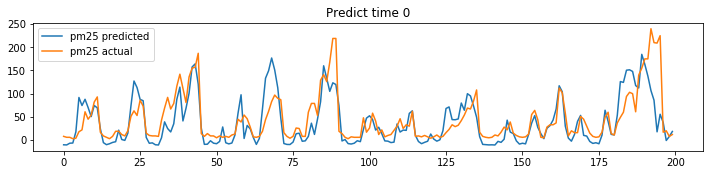

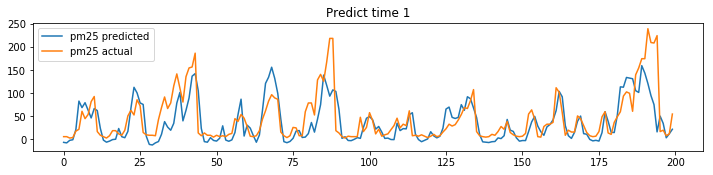

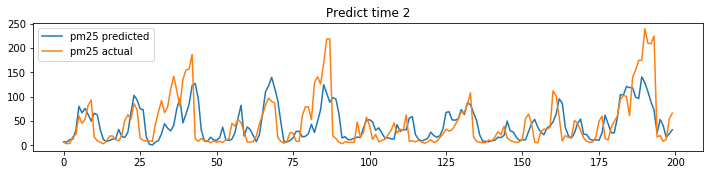

In [127]:
# Plot for LSTM
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict_lstm[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

In [95]:
y_pred

tensor([[ 0.1462,  0.4424,  0.3941],
        [ 0.1464,  0.4426,  0.3943],
        [ 0.1462,  0.4424,  0.3941],
        ...,
        [ 0.1462,  0.4424,  0.3940],
        [ 0.1462,  0.4424,  0.3941],
        [ 0.1462,  0.4424,  0.3940]])

In [85]:
pm25_predict_lstm

array([[84.98489 , 81.81551 , 74.51142 ],
       [83.79421 , 80.81477 , 73.55305 ],
       [85.29933 , 82.07638 , 74.76462 ],
       ...,
       [85.32416 , 82.09897 , 74.787796],
       [85.30145 , 82.07902 , 74.76753 ],
       [85.331955, 82.103836, 74.79153 ]], dtype=float32)